<a href="https://colab.research.google.com/github/CopypastCore/IAD/blob/main/IAD_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import os

In [41]:
import os
import shutil

In [2]:
!pip install tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf


In [23]:
import tensorflow as tf

url = "https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip"

path = tf.keras.utils.get_file(
    "fruits360.zip",
    origin=url,
    extract=True
)

797892608/Unknown 34s 0us/step

In [26]:
import os

print(os.listdir("/root/.keras/datasets"))


['fruits360.zip', 'fruits360_extracted']


In [28]:
print(os.listdir("/root/.keras/datasets/fruits360_extracted"))


['Fruit-Images-Dataset-master']


In [29]:
print(os.listdir("/root/.keras/datasets/fruits360_extracted/Fruit-Images-Dataset-master"))


['readme.md', 'src', 'LICENSE', 'papers', 'Test', 'Training', 'test-multiple_fruits']


In [30]:
BASE_DIR = "/root/.keras/datasets/fruits360_extracted/Fruit-Images-Dataset-master"

TRAIN_DIR = os.path.join(BASE_DIR, "Training")
TEST_DIR  = os.path.join(BASE_DIR, "Test")

print("Классы:", len(os.listdir(TRAIN_DIR)))
print(os.listdir(TRAIN_DIR)[:5])


Классы: 131
['Apple Red Yellow 1', 'Tomato 4', 'Grape White', 'Mango Red', 'Pear']


In [39]:
SOURCE_BASE = "/root/.keras/datasets/fruits360_extracted/Fruit-Images-Dataset-master"
TARGET_BASE = "/root/fruits360_small"

TRAIN_SRC = os.path.join(SOURCE_BASE, "Training")
TEST_SRC  = os.path.join(SOURCE_BASE, "Test")

TRAIN_DST = os.path.join(TARGET_BASE, "Training")
TEST_DST  = os.path.join(TARGET_BASE, "Test")

os.makedirs(TRAIN_DST, exist_ok=True)
os.makedirs(TEST_DST, exist_ok=True)


In [40]:
SELECTED_CLASSES = [
    "Apple Red Yellow 1",
    "Banana",
    "Grape White",
    "Mango",
    "Pear"
]


In [42]:
for cls in SELECTED_CLASSES:
    shutil.copytree(
        os.path.join(TRAIN_SRC, cls),
        os.path.join(TRAIN_DST, cls),
        dirs_exist_ok=True
    )

    shutil.copytree(
        os.path.join(TEST_SRC, cls),
        os.path.join(TEST_DST, cls),
        dirs_exist_ok=True
    )


In [43]:
print("Train classes:", os.listdir(TRAIN_DST))
print("Test classes:", os.listdir(TEST_DST))

Train classes: ['Apple Red Yellow 1', 'Grape White', 'Pear', 'Mango', 'Banana']
Test classes: ['Apple Red Yellow 1', 'Grape White', 'Pear', 'Mango', 'Banana']


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 16



In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [53]:
train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

k = train_gen.num_classes


Found 1964 images belonging to 5 classes.
Found 490 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [84]:
cnn_model = Sequential([
    Conv2D(32, 3, activation='relu', kernel_regularizer=l2(1e-4), input_shape=(128,128,3)),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(),

    Conv2D(128, 3, activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(),

    Flatten(),

    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),

    Dense(k, activation='softmax')
])



In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Dropout,
    BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation


cnn_model = Sequential([

    Conv2D(32, (3,3), padding='same',
           kernel_regularizer=l2(1e-4),
           input_shape=(128,128,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), padding='same',
           kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(128, (3,3), padding='same',
           kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu',
          kernel_regularizer=l2(1e-4)),
    Dropout(0.6),

    Dense(k, activation='softmax')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,301 (434.77 KB)

 Trainable params: 110,853 (433.02 KB)

 Non-trainable params: 448 (1.75 KB)

In [89]:
cnn_model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [90]:
history_cnn = cnn_model.fit(
    train_gen,
    epochs=12,
    validation_data=val_gen
)


Epoch 1/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 121s 953ms/step - accuracy: 0.5542 - loss: 1.2254 - val_accuracy: 0.2041 - val_loss: 1.6556
Epoch 2/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 119s 969ms/step - accuracy: 0.9467 - loss: 0.3541 - val_accuracy: 0.2000 - val_loss: 2.3121
Epoch 3/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 117s 952ms/step - accuracy: 0.9758 - loss: 0.2146 - val_accuracy: 0.3265 - val_loss: 1.5525
Epoch 4/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 139s 928ms/step - accuracy: 0.9921 - loss: 0.1377 - val_accuracy: 0.9878 - val_loss: 0.2634
Epoch 5/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 116s 947ms/step - accuracy: 0.9957 - loss: 0.1010 - val_accuracy: 1.0000 - val_loss: 0.0494
Epoch 6/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 117s 951ms/step - accuracy: 0.9969 - loss: 0.0896 - val_accuracy: 1.0000 - val_loss: 0.0357
Epoch 7/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 121s 987ms/step - accuracy: 0.9929 - loss: 0.0785 - val_accuracy: 1.0000 - val_loss: 0.0305
Epoch 8/12
123/123 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9952 - lo

In [79]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
base_mn = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128,128,3)
)
base_mn.trainable = False


In [60]:
x = base_mn.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(k, activation='softmax')(x)

mobilenet_model = Model(base_mn.input, output)


In [61]:
mobilenet_model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [62]:
history_mn = mobilenet_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 55s 391ms/step - accuracy: 0.5608 - loss: 1.2117 - val_accuracy: 1.0000 - val_loss: 0.1354
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 46s 374ms/step - accuracy: 0.9732 - loss: 0.1298 - val_accuracy: 0.9959 - val_loss: 0.0538
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 379ms/step - accuracy: 0.9911 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss: 0.0332
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 46s 372ms/step - accuracy: 0.9966 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 368ms/step - accuracy: 0.9972 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 350ms/step - accuracy: 0.9997 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 333ms/step - accuracy: 0.9992 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 40s 325ms/step - accuracy: 0.9988 - loss: 0

In [63]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2

In [64]:
base_vgg = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128,128,3)
)

base_vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [65]:
x = base_vgg.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.3)(x)
output = Dense(k, activation='softmax')(x)

vgg_model = Model(base_vgg.input, output)

In [66]:
vgg_model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [67]:
history_vgg = vgg_model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)


Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.5249 - loss: 1.2633 - val_accuracy: 0.9551 - val_loss: 0.3264
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 453s 4s/step - accuracy: 0.9044 - loss: 0.3764 - val_accuracy: 0.9857 - val_loss: 0.1506
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.9539 - loss: 0.2159 - val_accuracy: 1.0000 - val_loss: 0.0957
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 475s 4s/step - accuracy: 0.9848 - loss: 0.1347 - val_accuracy: 0.9959 - val_loss: 0.0710
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 477s 4s/step - accuracy: 0.9929 - loss: 0.0927 - val_accuracy: 0.9980 - val_loss: 0.0584


In [81]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title + " Accuracy")
    plt.legend(["train", "val"])

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title + " Loss")
    plt.legend(["train", "val"])

    plt.show()


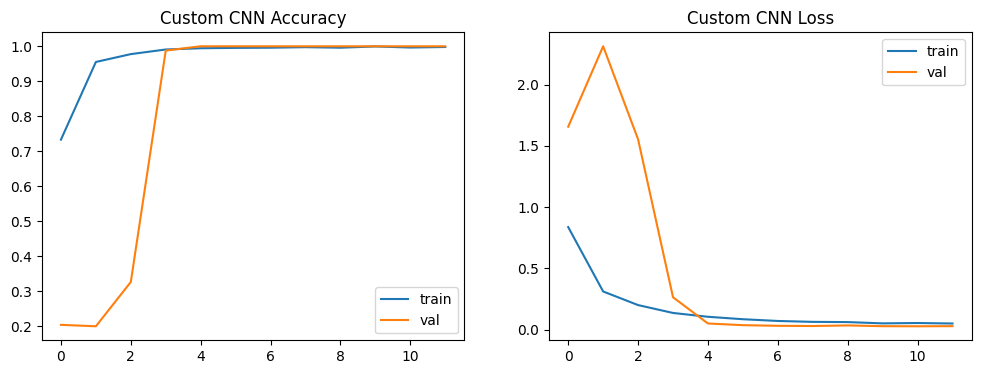

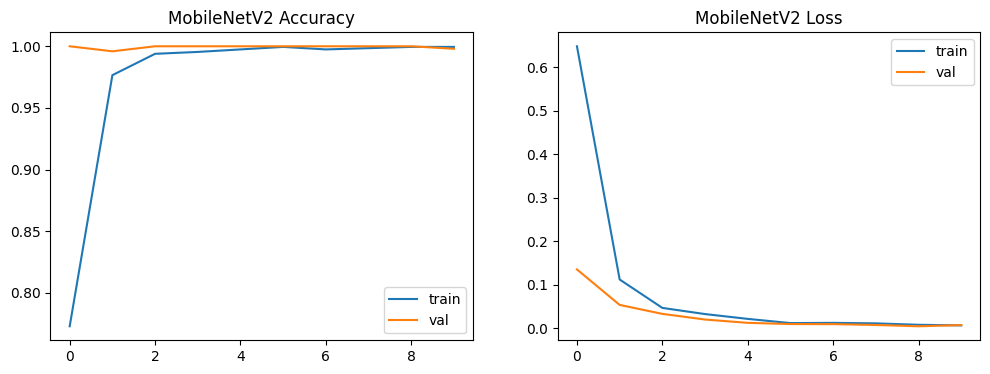

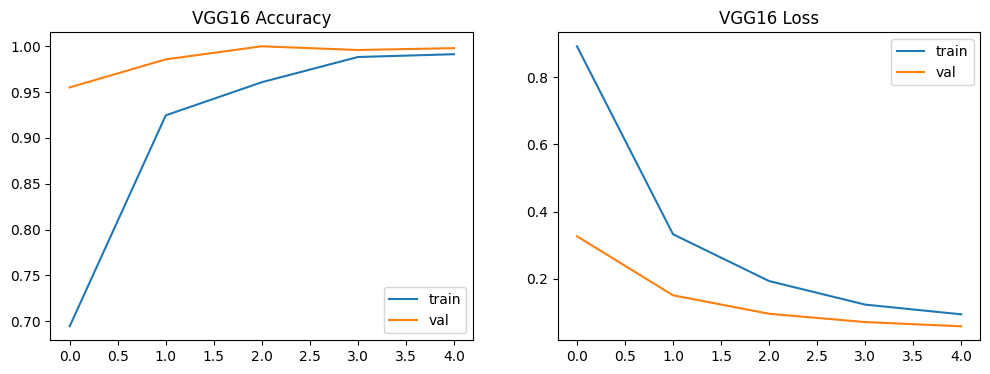

In [91]:
plot_history(history_cnn, "Custom CNN")
plot_history(history_mn, "MobileNetV2")
plot_history(history_vgg, "VGG16")


In [71]:
print("CNN test:", cnn_model.evaluate(test_gen))
print("MobileNetV2 test:", mobilenet_model.evaluate(test_gen))
print("VGG16 test:", vgg_model.evaluate(test_gen))


52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9973 - loss: 0.0067
CNN test: [0.003348252037540078, 0.998789370059967]
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 1.0000 - loss: 0.0067
MobileNetV2 test: [0.005637488327920437, 1.0]
52/52 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9836 - loss: 0.0960
VGG16 test: [0.0778394266963005, 0.991525411605835]


In [74]:
from sklearn.metrics import classification_report
import numpy as np


In [92]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, test_gen, model_name):
    # истинные метки
    y_true = test_gen.classes

    # предсказания модели
    y_pred = np.argmax(model.predict(test_gen), axis=1)

    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))

    print(
        classification_report(
            y_true,
            y_pred,
            target_names=list(test_gen.class_indices.keys())
        )
    )


In [93]:
evaluate_model(cnn_model, test_gen, "Custom CNN")
evaluate_model(vgg_model, test_gen, "VGG16 (Transfer Learning)")
evaluate_model(mobilenet_model, test_gen, "MobileNetV2 (Transfer Learning)")

52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step

===== Custom CNN =====
Accuracy: 1.0
                    precision    recall  f1-score   support

Apple Red Yellow 1       1.00      1.00      1.00       164
            Banana       1.00      1.00      1.00       166
       Grape White       1.00      1.00      1.00       166
             Mango       1.00      1.00      1.00       166
              Pear       1.00      1.00      1.00       164

          accuracy                           1.00       826
         macro avg       1.00      1.00      1.00       826
      weighted avg       1.00      1.00      1.00       826

52/52 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step

===== VGG16 (Transfer Learning) =====
Accuracy: 0.9915254237288136
                    precision    recall  f1-score   support

Apple Red Yellow 1       1.00      0.96      0.98       164
            Banana       1.00      1.00      1.00       166
       Grape White       1.00      1.00      1.00       166
             Mango       1.0